# Load Dataset

In [1]:
import os
import pandas as pd
df = pd.read_csv(r"C:\Users\Maphena\Desktop\Weather.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# EDA

Date/Time: The date and time of the weather observation.

Temp_c: Temperature at the time of observation.

Dew Point Temp_C: Temperature at which air becomes saturated with moisture.

Rel Hum_%: The amount of moisture in the air compared to the maximum it could hold at that temperature.

Wind Speed_km/h: Air movement.

Visibility_km: The distance one can clearly see, affected by conditions like fog, rain or snow.

Press_kPa: Changes in pressure can indicate approaching weather systems and influence wind patterns.

Weather: Describe general weather conditions.


In [2]:
# Checking if there is null values
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

There are no null value, we are good!!

In [3]:
# Checking no. of unique values
df['Weather'].nunique()

50

We have to minimize the categorizing of Weather

In [5]:
weather_category = {
    'Clear': ['Clear', 'Mainly Clear'],
    'Cloudy': ['Mostly Cloudy', 'Cloudy'],
    'Foggy': ['Fog', 'Freezing Drizzle,Fog', 'Freezing Rain,Fog', 'Rain,Fog', 
                         'Drizzle,Fog', 'Freezing Fog', 'Snow,Fog', 'Thunderstorms,Rain Showers,Fog', 
                         'Rain Showers,Fog', 'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow,Fog', 'Snow Showers,Fog'],
    'Rainy': ['Rain', 'Rain Showers', 'Thunderstorms,Rain', 'Thunderstorms,Rain Showers',
                         'Thunderstorms,Heavy Rain Showers', 'Thunderstorms,Rain Showers,Fog', 
                         'Thunderstorms,Rain,Fog', 'Rain Showers,Snow Showers', 'Rain,Snow', 'Rain,Snow Grains',
                         'Rain,Ice Pellets', 'Rain,Snow,Fog', 'Moderate Rain,Fog'],
    'Snowy': ['Snow', 'Snow Showers', 'Moderate Snow', 'Freezing Drizzle,Snow',
                         'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Snow,Haze', 'Snow,Ice Pellets',
                         'Snow Pellets', 'Drizzle,Snow', 'Rain,Snow,Ice Pellets', 'Snow Showers,Fog',
                         'Moderate Snow,Blowing Snow'],
    'Hazy': ['Haze', 'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Rain,Haze'],
    'Other': ['Drizzle', 'Freezing Drizzle', 'Moderate Rain', 'Freezing Drizzle,Snow',
                                 'Freezing Rain,Snow Grains', 'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Snow',
                                 'Drizzle,Snow,Fog', 'Drizzle,Ice Pellets,Fog', 'Thunderstorms',
                                 'Thunderstorms,Moderate Rain Showers,Fog']
}
df['weather_category'] = df['Weather'].apply(lambda x: next((key for key, values in weather_category.items() if x in values), 'Other'))

In [6]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,weather_category
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Foggy
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Foggy
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Foggy
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Foggy
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Foggy
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,Snowy
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,Snowy
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Snowy
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Snowy


In [7]:
df = df.drop(columns = ['Weather'])
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,weather_category
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Foggy
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Foggy
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,Foggy
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,Foggy
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Foggy
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snowy
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snowy
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snowy
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snowy


In [8]:
df.rename(columns={'weather_category': 'Weather'}, inplace=True)
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Foggy
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Foggy
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,Foggy
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,Foggy
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Foggy
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snowy
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snowy
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snowy
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snowy


In [9]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors = 'coerce')
distinct_years = df['Date/Time'].dt.year.unique()
distinct_years

array([2012], dtype=int64)

In [10]:
df['Month_Year'] = df['Date/Time'].dt.strftime('%b %Y').str.upper()
df = df.drop(columns = ['Date/Time'])
df = pd.concat([df['Month_Year'], df.drop(columns = ['Month_Year'])], axis = 1)
df

,Month_Year,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,JAN 2012,-1.8,-3.9,86,4,8.0,101.24,Foggy
1,JAN 2012,-1.8,-3.7,87,4,8.0,101.24,Foggy
2,JAN 2012,-1.8,-3.4,89,7,4.0,101.26,Foggy
3,JAN 2012,-1.5,-3.2,88,6,4.0,101.27,Foggy
4,JAN 2012,-1.5,-3.3,88,7,4.8,101.23,Foggy
...,...,...,...,...,...,...,...,...
8779,DEC 2012,0.1,-2.7,81,30,9.7,100.13,Snowy
8780,DEC 2012,0.2,-2.4,83,24,9.7,100.03,Snowy
8781,DEC 2012,-0.5,-1.5,93,28,4.8,99.95,Snowy
8782,DEC 2012,-0.2,-1.8,89,28,9.7,99.91,Snowy


In [11]:
df['month'] = pd.to_datetime(df['Month_Year'], format='%b %Y').dt.strftime('%b')

# Define a mapping for seasons
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring',
    'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Fall',
    'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'
}

# Create a new 'season' column based on the 'month' column
df['Season'] = df['month'].map(season_mapping)
df = df.drop(columns = ['month'])
df

,Month_Year,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Season
0,JAN 2012,-1.8,-3.9,86,4,8.0,101.24,Foggy,Winter
1,JAN 2012,-1.8,-3.7,87,4,8.0,101.24,Foggy,Winter
2,JAN 2012,-1.8,-3.4,89,7,4.0,101.26,Foggy,Winter
3,JAN 2012,-1.5,-3.2,88,6,4.0,101.27,Foggy,Winter
4,JAN 2012,-1.5,-3.3,88,7,4.8,101.23,Foggy,Winter
...,...,...,...,...,...,...,...,...,...
8779,DEC 2012,0.1,-2.7,81,30,9.7,100.13,Snowy,Winter
8780,DEC 2012,0.2,-2.4,83,24,9.7,100.03,Snowy,Winter
8781,DEC 2012,-0.5,-1.5,93,28,4.8,99.95,Snowy,Winter
8782,DEC 2012,-0.2,-1.8,89,28,9.7,99.91,Snowy,Winter


In [12]:
selected = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
for i in selected:
    std = df[i].std()
    print(f'Standard deviation for {i}: {std}')

Standard deviation for Temp_C: 11.687882769691226
Standard deviation for Dew Point Temp_C: 10.883072319155737
Standard deviation for Rel Hum_%: 16.918881470076556
Standard deviation for Wind Speed_km/h: 8.688696079468906
Standard deviation for Visibility_km: 12.62268824517152
Standard deviation for Press_kPa: 0.8440047459486474


It seems like the temperature, dew point, humidity, visibility, and wind speed can all change quite a bit, while the air pressure stays relatively constant.

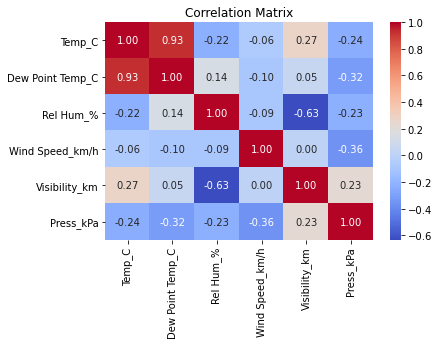

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
correlation_matrix = df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 
'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

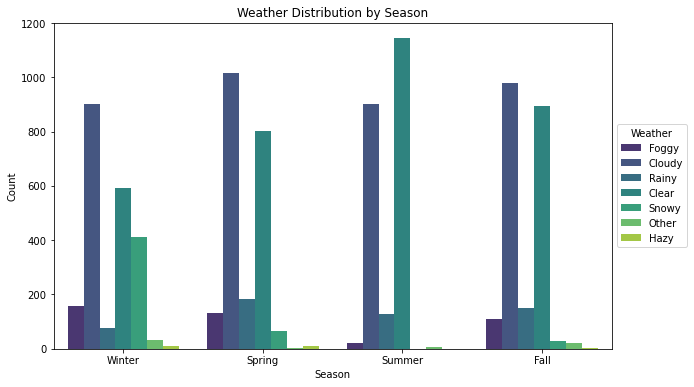

In [15]:
# Set a larger figure size
plt.figure(figsize=(10, 6))

sns.countplot(x='Season', hue='Weather', data=df, palette='viridis')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Weather Distribution by Season')

# Show the legend
plt.legend(title='Weather', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()